In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# prompt: import the file 50_startups as Startups

import pandas as pd
# Assuming 50_Startups.csv is in the current directory
# If not, provide the correct path
Startups = pd.read_csv('50_Startups.csv')
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


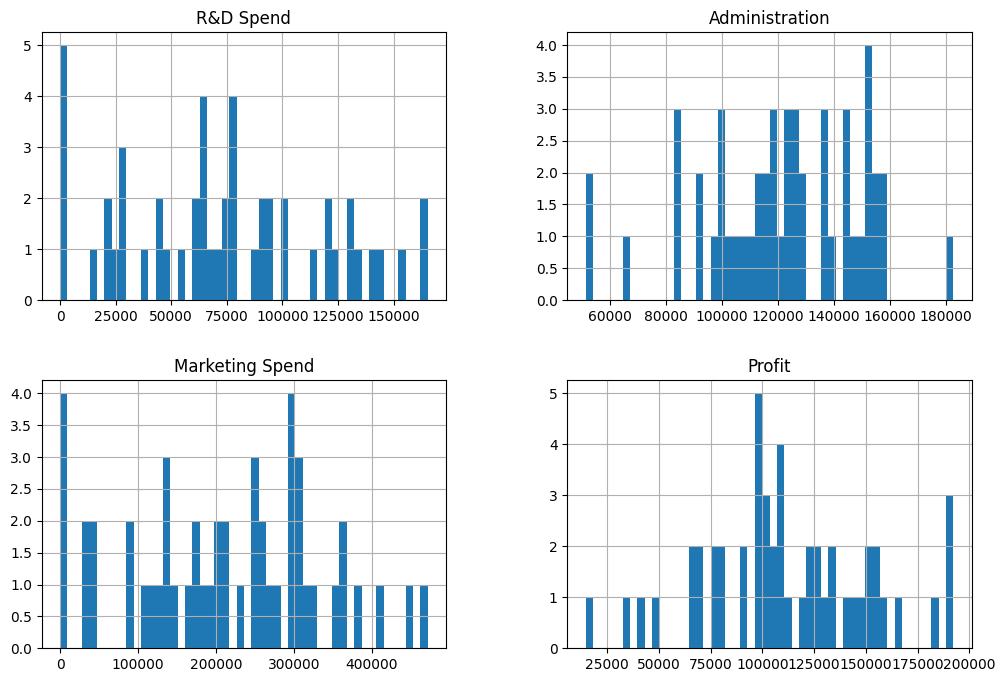

In [ ]:
Startups.hist(bins=50, figsize=(12,8))
plt.show()

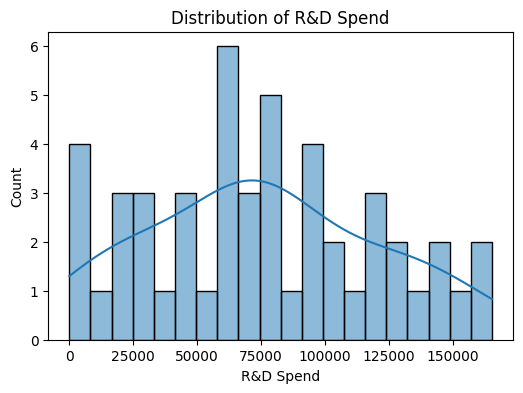

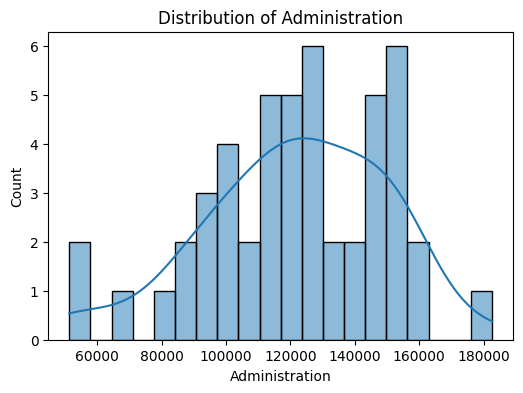

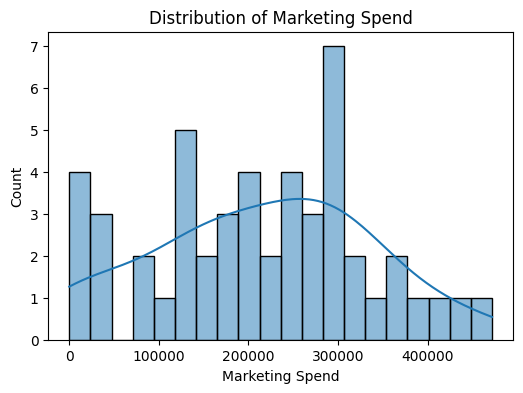

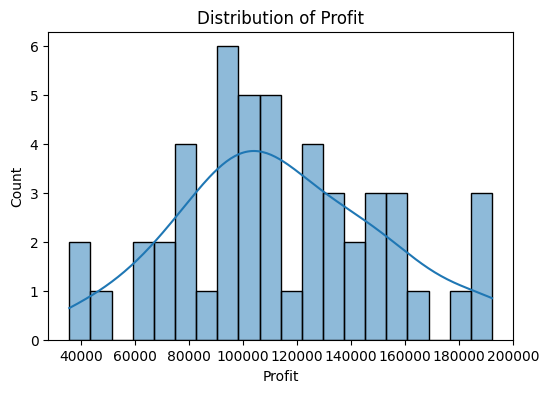

In [ ]:
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(Startups[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

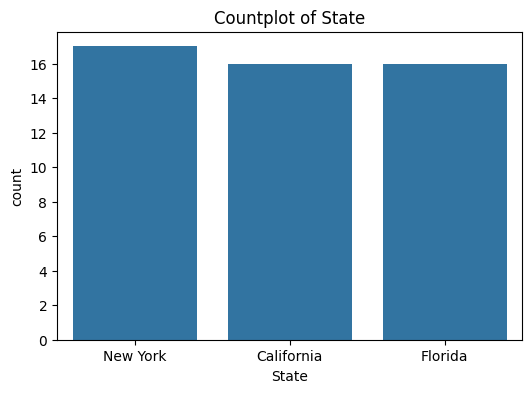

In [ ]:
categorical_cols = ['State']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=Startups[col])
    plt.title(f'Countplot of {col}')
    plt.show()

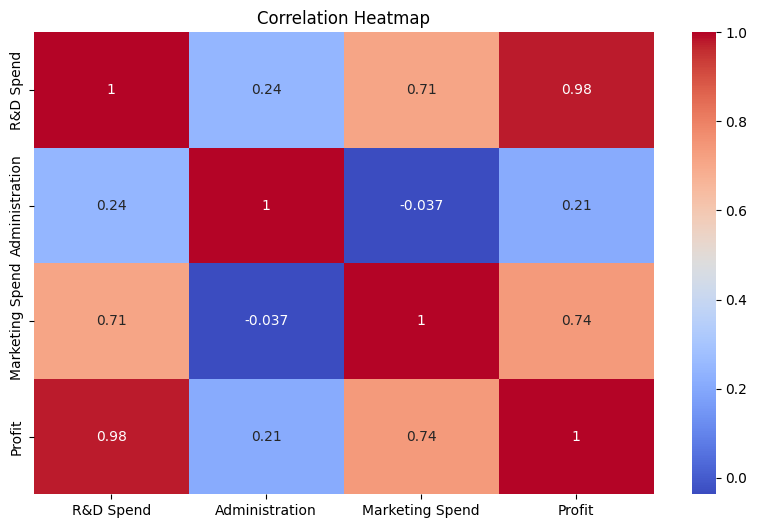

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = Startups.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

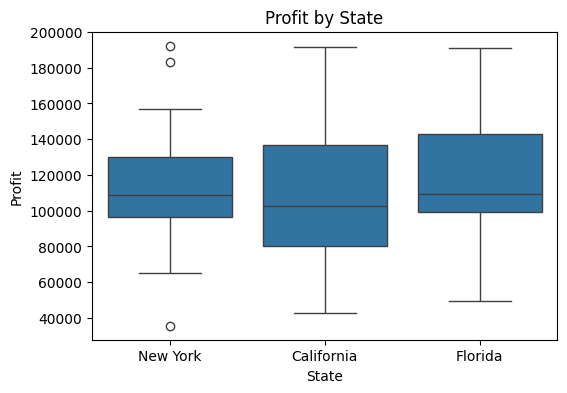

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Startups['State'], y=Startups['Profit'])
plt.title('Profit by State')
plt.show()

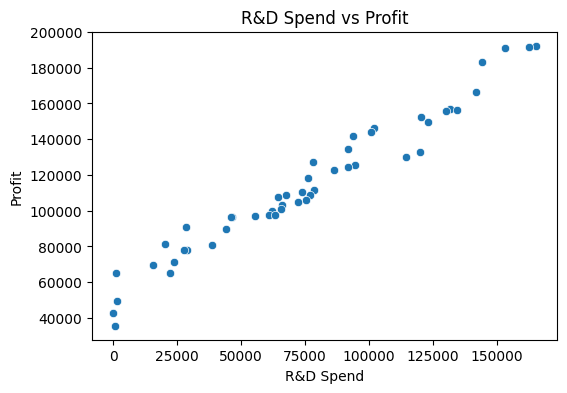

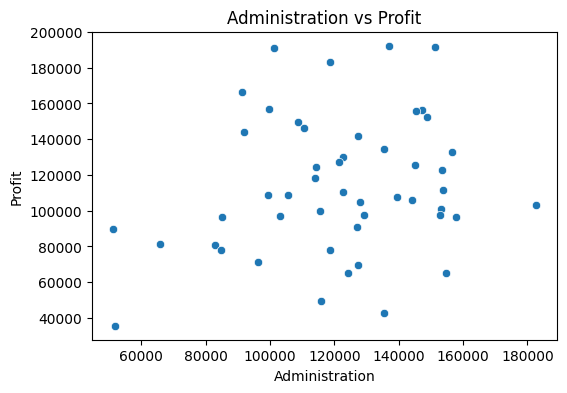

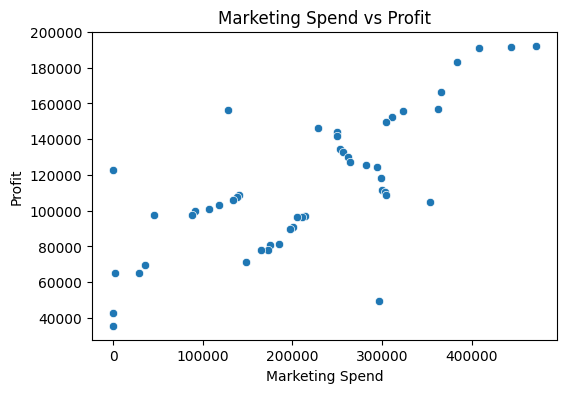

In [ ]:
for col in numerical_cols[:-1]:  # Exclude 'Profit' itself
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=Startups[col], y=Startups['Profit'])
    plt.title(f'{col} vs Profit')
    plt.show()

In [ ]:
# prompt: remove outliers for all the columns

import pandas as pd
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Assuming 50_Startups.csv is in the current directory
# If not, provide the correct path
Startups = pd.read_csv('50_Startups.csv')

# Remove outliers for all numerical columns
for col in ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']:
    Startups = remove_outliers(Startups, col)

Startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
Startups.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
Startups.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [31]:
X = Startups[["R&D Spend"]]
y = Startups["Profit"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [36]:
r2_score( y_test, y_pred)

0.9403835003089829

An R² score of 0.9404 is an excellent result, indicating that the linear regression model explains 94.04% of the variance in the target variable (y_test) based on the features provided.

In [37]:
print(lr.intercept_)

52367.98547027777


The intercept value of 52,367.99 from your linear regression model represents the predicted value of the dependent variable when all the independent variables are set to zero.

Interpretation:

This means that if the R&D Spend, Administration, and Marketing Spend were all zero, the model predicts that the Profit would be 52,367.99.

In [38]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([188867.92325999])

In [39]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [40]:
import pickle

In [41]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [42]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [43]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [44]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([188867.92325999, 186596.49056586, 179037.82463103, 171551.05368924,
       169681.18123694])

In [45]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  128310.025179
45   64926.08   53193.700580
47   42559.73   52367.985470
44   65200.33   70676.269576
17  125370.37  130509.860069


The output indicates a comparison between the actual values and the predicted values for the first few observations in the test set.

Interpretation:

Actual Values:

These are the true values of the target variable in the test dataset.

Predicted Values:

These are the values predicted by linear regression model for the corresponding test observations.

Insight:

The closer the Predicted values are to the Actual values, the better the model's performance.

Observation 1: Predicted 128310.03 is fairly close to the actual value of 134307.35.

Observation 3: Predicted 52367.99 is extremely close to the actual value of 42559.73, indicating a strong prediction for this case.